In [2]:
import xgboost
import shap
shap.initjs()  # notebook环境下，加载用于可视化的JS代码

# 我们先训练好一个XGBoost model
X,y = shap.datasets.boston()
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

In [3]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)  # 传入特征矩阵X，计算SHAP值

In [4]:
# 可视化第一个prediction的解释   如果不想用JS,传入matplotlib=True
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

In [5]:
y_base = explainer.expected_value
print(y_base)

pred = model.predict(xgboost.DMatrix(X))
print(pred.mean())

14.230186
14.230188


In [6]:
shap.force_plot(explainer.expected_value, shap_values, X)


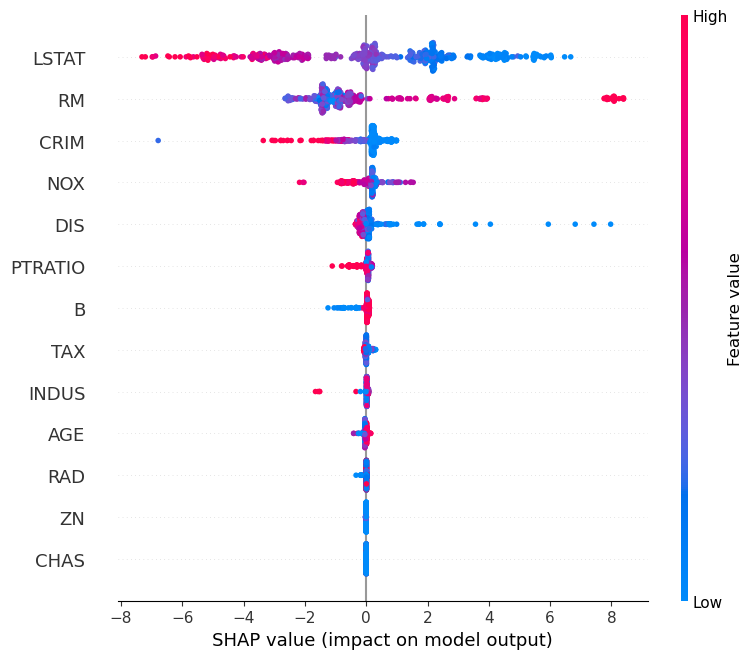

In [7]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

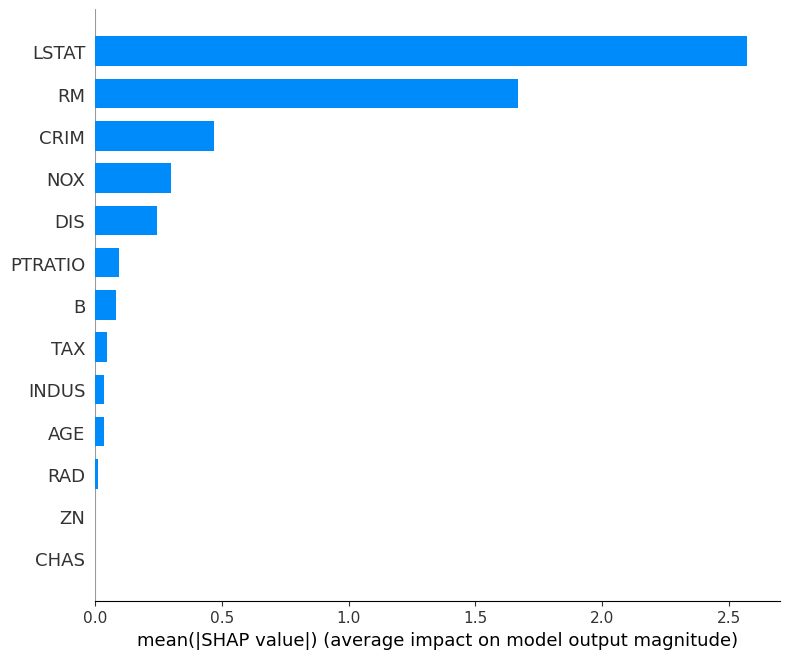

In [8]:
shap.summary_plot(shap_values, X, plot_type="bar")


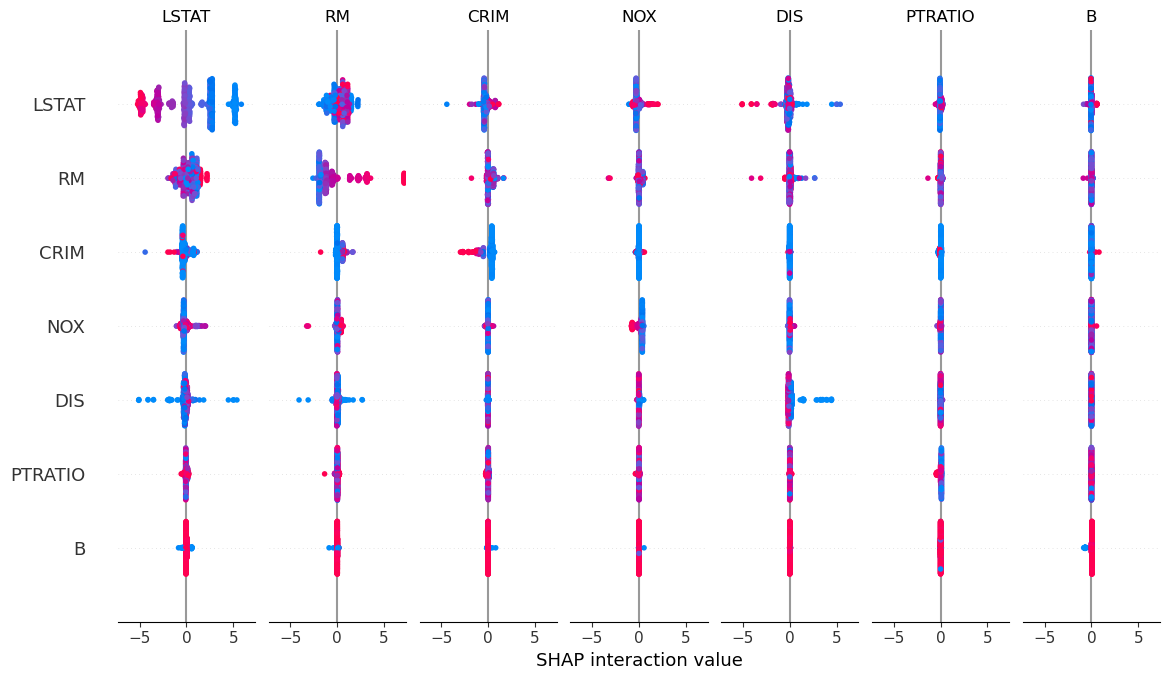

In [9]:
shap_interaction_values = explainer.shap_interaction_values(X)
shap.summary_plot(shap_interaction_values, X)

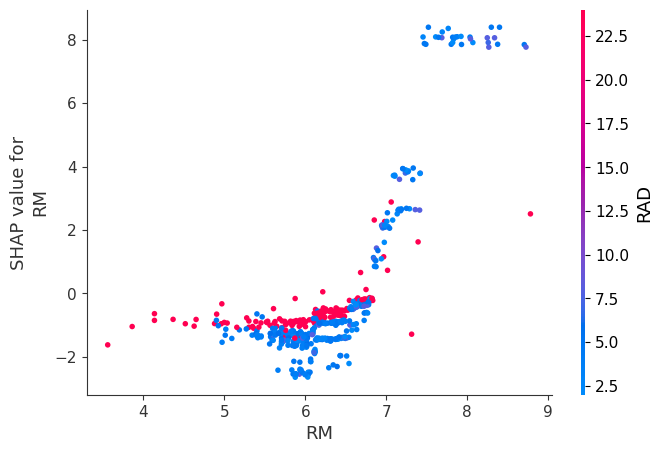

In [10]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X)

In [11]:
# using kmeans
X_train_summary = shap.kmeans(X_train, 10)


t0 = time.time()
explainerKNN = shap.KernelExplainer(knn.predict, X_train_summary)
shap_values_KNN_train = explainerKNN.shap_values(X_train)
shap_values_KNN_test = explainerKNN.shap_values(X_test)
timeit=time.time()-t0
timeit

NameError: name 'X_train' is not defined